In [1]:
import pandas as pd
import numpy as np
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
import gc
%matplotlib inline

In [2]:
# Random State
np.random.seed(42)

In [3]:
# Let's import csv files.
# https://www.kaggle.com/c/ashrae-energy-prediction/data

zf = zipfile.ZipFile(r'aep-data\\ashrae-energy-prediction.zip')

df_train = pd.read_csv(zf.open('train.csv'), parse_dates=['timestamp'])

df_weather_train = pd.read_csv(zf.open('weather_train.csv'), parse_dates=['timestamp'])

df_building_metadata = pd.read_csv(zf.open('building_metadata.csv'))

df_test = pd.read_csv(zf.open('test.csv'), parse_dates=['timestamp'])

df_weather_test = pd.read_csv(zf.open('weather_test.csv'), parse_dates=['timestamp'])

print('Train Shape: ', df_train.shape)
print('Weather Train Shape: ', df_weather_train.shape)
print('Building Metadata Shape: ', df_building_metadata.shape)
print('Test Shape: ', df_test.shape)
print('Weather Test Shape: ', df_weather_test.shape)

Train Shape:  (20216100, 4)
Weather Train Shape:  (139773, 9)
Building Metadata Shape:  (1449, 6)
Test Shape:  (41697600, 4)
Weather Test Shape:  (277243, 9)


In [4]:
# Let's create our train and test combined dataframes
# First merge building meta data to our train and test data. Then with site_id and timestamp columns 
# i've merged wheather data to train and test data.

df_X = df_train.merge(df_building_metadata, how='left', left_on=['building_id'], right_on=['building_id'])
df_X = df_X.merge(df_weather_train, how='left', left_on=['site_id','timestamp'], right_on=['site_id','timestamp'])

df_X_given_test = df_test.merge(df_building_metadata, how='left', left_on=['building_id'], right_on=['building_id'])
df_X_given_test = df_X_given_test.merge(df_weather_test, how='left', left_on=['site_id','timestamp'], right_on=['site_id','timestamp'])

print('Combined Train Shape: ', df_X.shape)
print('Combined Test Shape: ', df_X_given_test.shape)

del df_train, df_weather_train, df_building_metadata, df_test, df_weather_test

Combined Train Shape:  (20216100, 16)
Combined Test Shape:  (41697600, 16)


In [5]:
df_X.head(10)

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,0,2016-01-01,0.0,0,Education,7432,2008.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,1,0,2016-01-01,0.0,0,Education,2720,2004.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
2,2,0,2016-01-01,0.0,0,Education,5376,1991.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
3,3,0,2016-01-01,0.0,0,Education,23685,2002.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
4,4,0,2016-01-01,0.0,0,Education,116607,1975.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
5,5,0,2016-01-01,0.0,0,Education,8000,2000.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
6,6,0,2016-01-01,0.0,0,Lodging/residential,27926,1981.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
7,7,0,2016-01-01,0.0,0,Education,121074,1989.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
8,8,0,2016-01-01,0.0,0,Education,60809,2003.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
9,9,0,2016-01-01,0.0,0,Office,27000,2010.0,NaN,25.0,6.0,20.0,NaN,1019.7,0.0,0.0


In [6]:
df_X_given_test.head(10)

,row_id,building_id,meter,timestamp,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,0,0,2017-01-01,0,Education,7432,2008.0,NaN,17.8,4.0,11.7,NaN,1021.4,100.0,3.6
1,1,1,0,2017-01-01,0,Education,2720,2004.0,NaN,17.8,4.0,11.7,NaN,1021.4,100.0,3.6
2,2,2,0,2017-01-01,0,Education,5376,1991.0,NaN,17.8,4.0,11.7,NaN,1021.4,100.0,3.6
3,3,3,0,2017-01-01,0,Education,23685,2002.0,NaN,17.8,4.0,11.7,NaN,1021.4,100.0,3.6
4,4,4,0,2017-01-01,0,Education,116607,1975.0,NaN,17.8,4.0,11.7,NaN,1021.4,100.0,3.6
5,5,5,0,2017-01-01,0,Education,8000,2000.0,NaN,17.8,4.0,11.7,NaN,1021.4,100.0,3.6
6,6,6,0,2017-01-01,0,Lodging/residential,27926,1981.0,NaN,17.8,4.0,11.7,NaN,1021.4,100.0,3.6
7,7,7,0,2017-01-01,0,Education,121074,1989.0,NaN,17.8,4.0,11.7,NaN,1021.4,100.0,3.6
8,8,7,1,2017-01-01,0,Education,121074,1989.0,NaN,17.8,4.0,11.7,NaN,1021.4,100.0,3.6
9,9,8,0,2017-01-01,0,Education,60809,2003.0,NaN,17.8,4.0,11.7,NaN,1021.4,100.0,3.6


year_built
0    2008.0
1    2004.0
2    1991.0
3    2002.0
4    1975.0
Name: year_built, dtype: float64
Shape:
 (20216100,)
Describe:
 count    8.088455e+06
mean     1.968277e+03
std      3.020815e+01
min      1.900000e+03
25%      1.951000e+03
50%      1.969000e+03
75%      1.993000e+03
max      2.017000e+03
Name: year_built, dtype: float64
Null Values:
 12127645
Null Value Percentage: 
 59.99003269671203
Unique Values Count:
 117
Unique Values:
 [2008. 2004. 1991. 2002. 1975. 2000. 1981. 1989. 2003. 2010. 1968. 1999.
 2013. 1974. 1996. 1980. 1977. 1990. 1985. 2001. 1969. 2005. 2016. 2014.
 1970. 1971. 2011. 1997. 2007. 1998. 2009. 1979. 1986. 2006. 1982. 1983.
   nan 1913. 1953. 1909. 1958. 1960. 1976. 1906. 1900. 1995. 1956. 1930.
 1967. 1919. 1955. 1965. 1907. 2012. 1992. 1948. 1950. 1941. 1957. 1964.
 1940. 1951. 1966. 1934. 1959. 1993. 1939. 1918. 1963. 1987. 1914. 1973.
 1988. 1935. 1942. 2015. 1931. 1928. 1929. 1908. 1927. 1923. 1962. 1944.
 1910. 1949. 2017. 1922. 1911. 1932. 

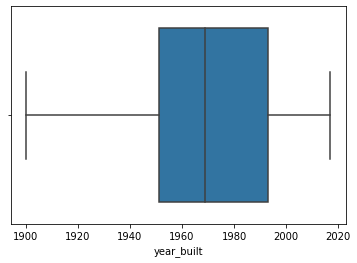

In [7]:
# Explore Data
for column in ['year_built']:
        print(column)
        print(df_X[column].head())
        print('Shape:\n', df_X[column].shape)
        print('Describe:\n', df_X[column].describe())
        print('Null Values:\n', df_X[column].isnull().sum())
        print('Null Value Percentage: \n', (df_X[column].isnull().sum()/df_X[column].shape[0])*100)
        print('Unique Values Count:\n', len(df_X[column].unique()))
        print('Unique Values:\n', df_X[column].unique())
        #df_X[column].hist()
        sns.boxplot(df_X[column])

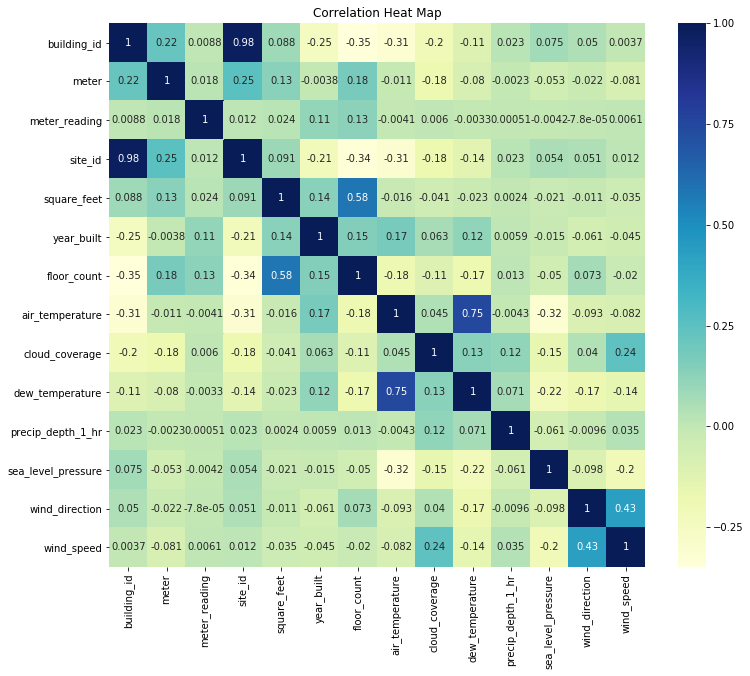

In [8]:
# Data Visualization
# Corelation Heat Map
# To see our faetures correlation with each other
plt.figure(figsize=(12,10))
sns.heatmap(df_X.corr(), cmap="YlGnBu",  annot=True)
plt.title('Correlation Heat Map')
plt.savefig(r'figures\\heatmap.png')

C:\Users\bilge\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


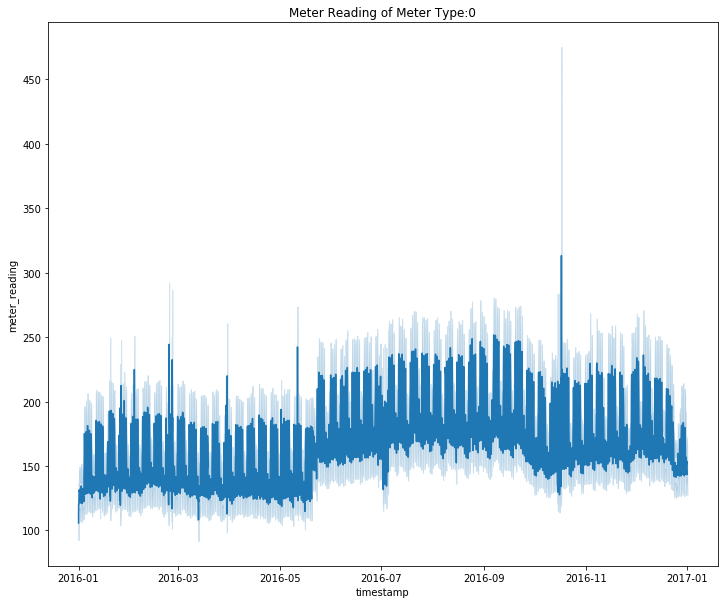

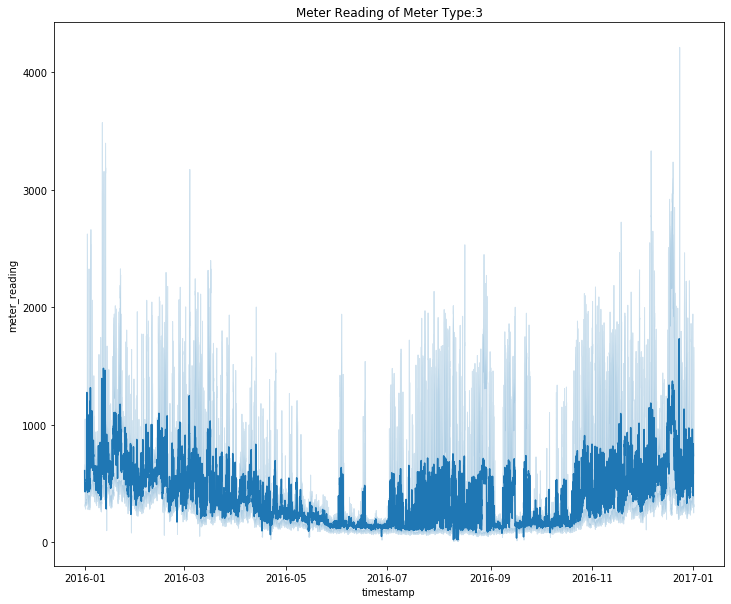

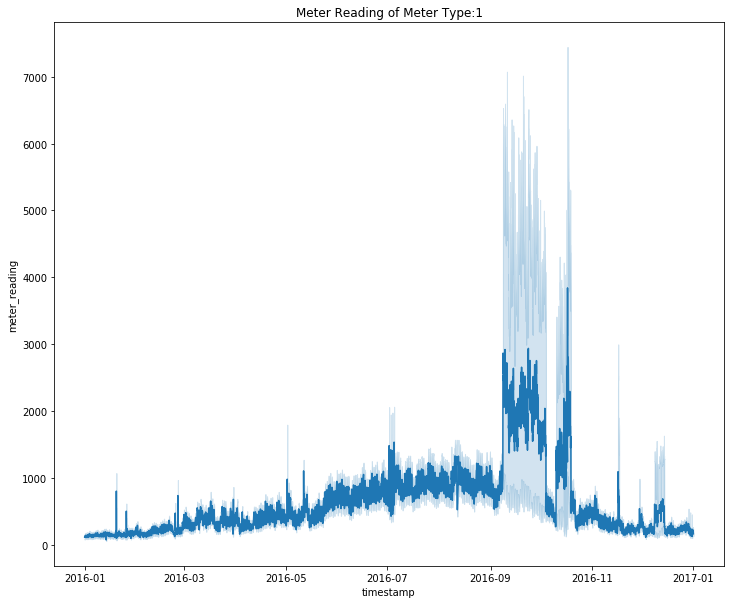

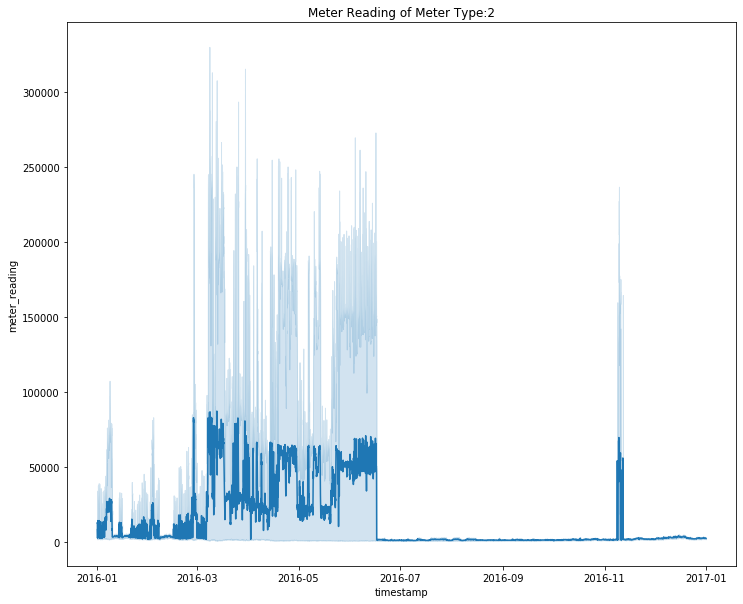

In [9]:
# Meter Reading
# Change of Meter Reading Over Time by Meter Type.
for meter_type in df_X['meter'].unique():
    data = df_X[df_X['meter'] == meter_type]
    plt.figure(figsize=(12,10))
    sns.lineplot(x='timestamp', y='meter_reading', data=data)
    plt.title('Meter Reading of Meter Type:{}'.format(meter_type))
    plt.savefig(r'figures\\meter_{}.png'.format(meter_type))

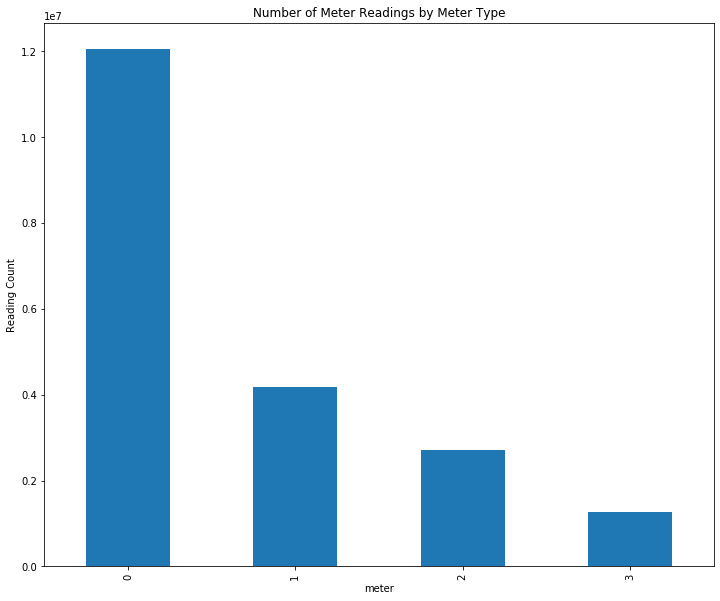

In [10]:
# Meter Reading Count() Group By Meter Type Use
plt.figure(figsize=(12,10))
df_X.groupby('meter')['meter_reading'].count().sort_values(ascending=False).plot(kind='bar')
plt.title('Number of Meter Readings by Meter Type')
plt.ylabel('Reading Count')
plt.savefig(r'figures\\meter_all.png')

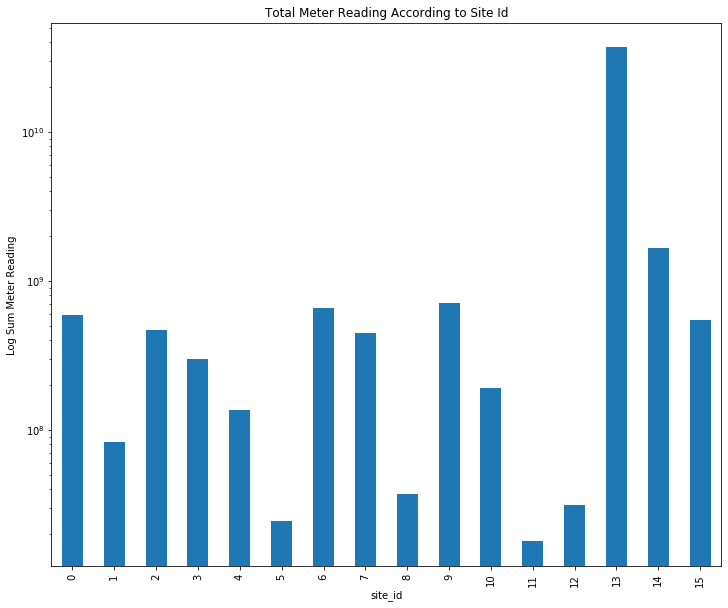

In [11]:
# Site id Use
plt.figure(figsize=(12,10))
df_X.groupby('site_id')['meter_reading'].sum().plot(kind='bar', logy=True)
plt.title('Total Meter Reading According to Site Id')
plt.ylabel('Log Sum Meter Reading')
plt.savefig(r'figures\\site_id.png')

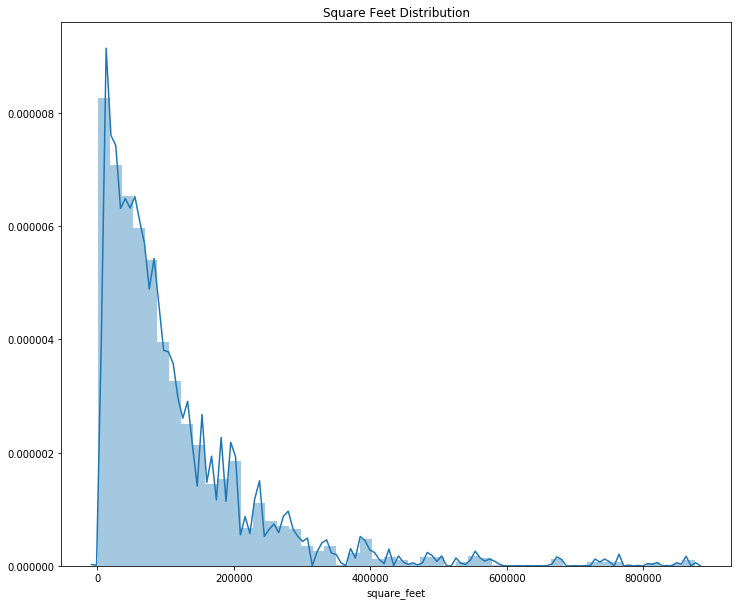

In [12]:
# Square Feet
plt.figure(figsize=(12,10))
sns.distplot(df_X['square_feet'])
plt.title('Square Feet Distribution')
plt.savefig(r'figures\\square_feet.png')

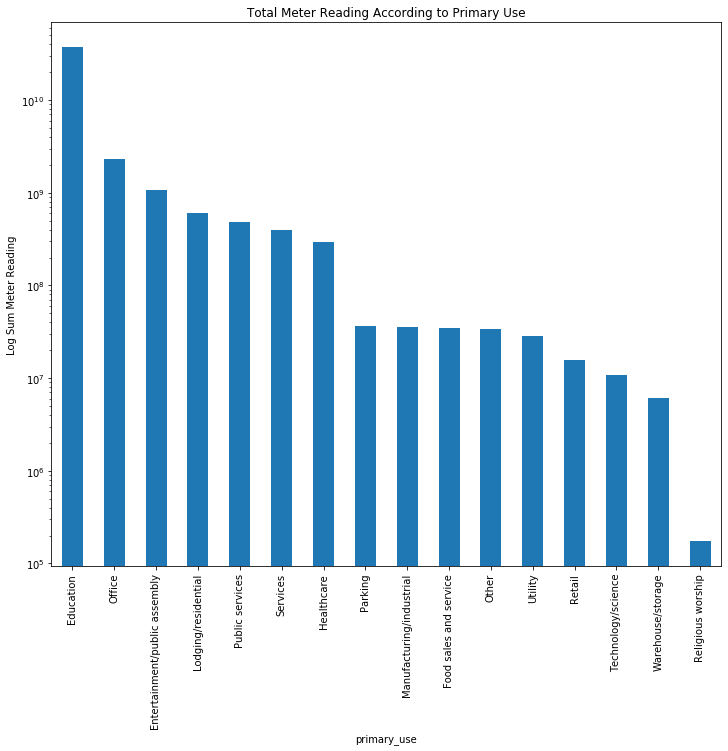

In [13]:
# Primary Use
plt.figure(figsize=(12,10))
df_X.groupby('primary_use')['meter_reading'].sum().sort_values(ascending=False).plot(kind='bar', logy=True)
plt.title('Total Meter Reading According to Primary Use')
plt.ylabel('Log Sum Meter Reading')
plt.savefig(r'figures\\primary_use.png')

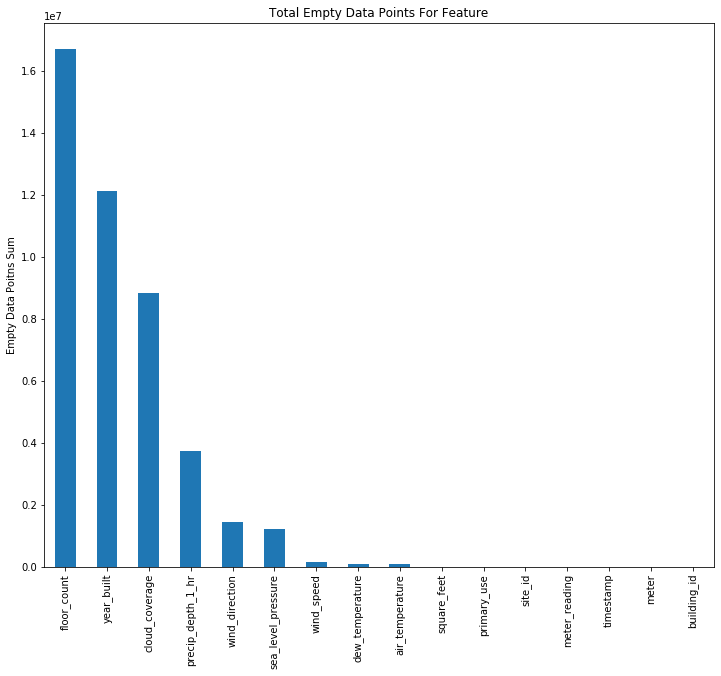

In [14]:
# Total Empty Numbers
plt.figure(figsize=(12,10))
df_X.isna().sum().sort_values(ascending=False).plot(kind='bar')
plt.title('Total Empty Data Points For Feature')
plt.ylabel('Empty Data Poitns Sum')
plt.savefig(r'figures\\emptyness.png')

C:\Users\bilge\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


<Figure size 432x288 with 0 Axes>

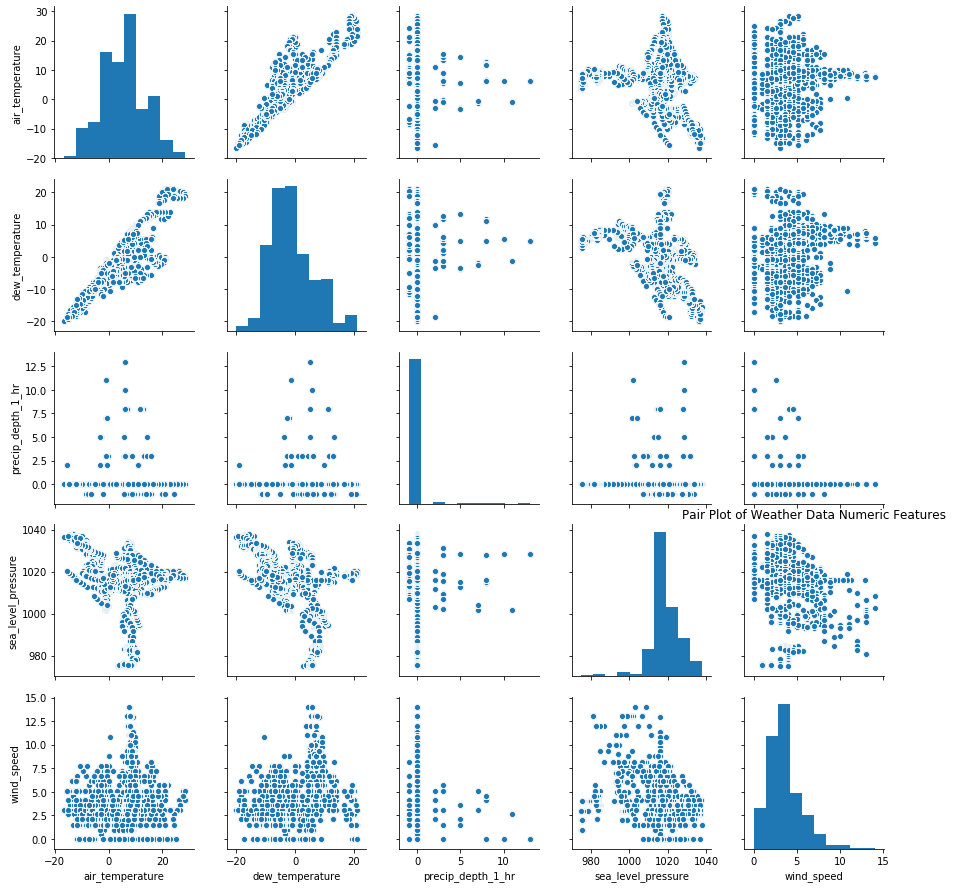

In [15]:
# Weather Columns Gridplot
# To examine weather columns all together, i had to impute them with median values 
# since pairplot does not handles nan values. Also i've chosen first %1 of the data since it is computationaly very expensive
# to plot grid plot of these featurese.
l_waether_columns = ['air_temperature', 'dew_temperature', 'precip_depth_1_hr', 'sea_level_pressure', 'wind_speed']
data = df_X[l_waether_columns]
for column in data.columns:
    median = data[column].median()
    data[column].fillna(median, inplace=True)
data = data[:200000] 
plt.figure()
sns.pairplot(data)
plt.title('Pair Plot of Weather Data Numeric Features')
plt.savefig(r'figures\\weather_gridplot.png')

In [16]:
# End of Exploratory Data Analysis and Visualization